### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Importing the dataset

In [ ]:
dataset = pd.read_csv('heart_disease.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

###Checking missing values in dataset

In [ ]:
print(pd.isnull(dataset).sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


###Checking the balance of dataset

In [ ]:
print(pd.Series(y).value_counts())

0    153
1    150
Name: count, dtype: int64


###Splitting the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###Model Training Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

###Predicting the test set results

In [ ]:
y_pred = classifier.predict(x_test)

###Comparing the original data to predicted data

In [ ]:
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)), 1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]]


### data Visualization of actual and predicted data

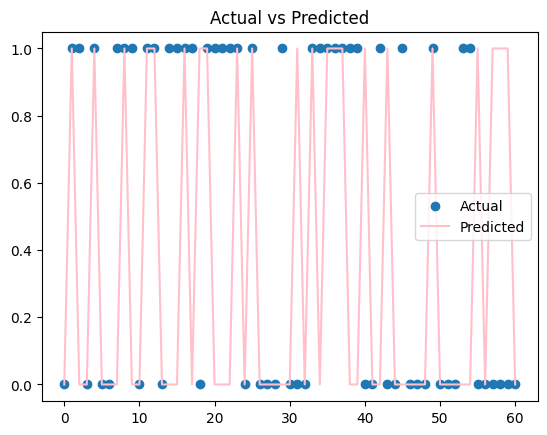

In [ ]:
plt.title('Actual vs Predicted')
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, color='pink', label='Predicted')
plt.legend()
plt.show()

###Confusion matrix

<Axes: >

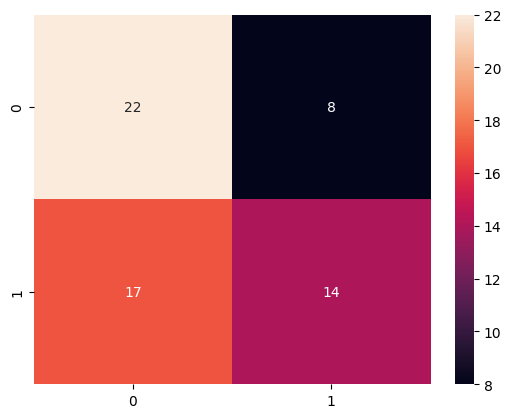

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

###Accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"The accuracy of the model is: {accuracy}")

The accuracy of the model is: 59.01639344262295


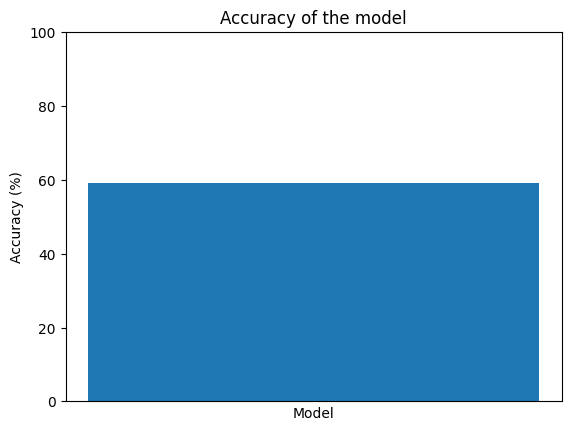

In [ ]:
plt.title('Accuracy of the model')
plt.bar(x=[0], height=accuracy)  # Provide a dummy x-value and the accuracy as height
plt.xticks([]) # Hide x-axis ticks
plt.xlabel('Model') # Label the x-axis
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100) # Set the y-axis limits to 0-100
plt.show()

### Save the model

In [ ]:
joblib.dump(classifier, 'heart_disease_prediction.pkl')

['heart_disease_prediction.pkl']

In [ ]:
joblib.dump(classifier, 'heart_disease_prediction.joblib')

['heart_disease_prediction.joblib']